![Shark attacks, a project by Roberto Henríquez Perozo. Data Analytics Bootcamp at IronHack](INPUT/shark-attacks.png)

<center>You can clone the repo of this project at <br>https://github.com/rihp/shark-attacks </center>

 <center><h1> PART II <br> Data analysis and hypothesis formulation</h1> </center>
 
 

In [1]:
# You should have an exported.csv file. 
# We generated it while following along the 'PART I' of this project. 
# Do you have it?
!ls
# If you don't, you can download the 'PART I' from: https://github.com/rihp/shark-attacks

analysis.ipynb	clean.ipynb   INPUT   README.md
attacks.csv	exported.csv  OUTPUT


In [2]:
# Importing modules
import pandas as pd
import numpy as np
import random
import matplotlib

pd.compat.PY3 = True
%matplotlib inline

In [3]:
# Loading the cleaned dataset as a dataframe
df = pd.read_csv('OUTPUT/exported.csv', encoding='latin-1')
df

UnicodeEncodeError: 'ascii' codec can't encode character u'\x92' in position 12103: ordinal not in range(128)

UnicodeDecodeError: 'ascii' codec can't decode byte 0xd7 in position 0: ordinal not in range(128)

In [4]:
# Review the columns of the exported dataset
df.columns

Index(['Unnamed: 0',    'CaseNum',       'Date',       'Year',       'Type',
          'Country',       'Area',   'Location',   'Activity',        'Sex',
           'Injury',      'Fatal',    'Species',     'Source',       'href',
         'Species2',  'Activity2'],
      dtype='object')

# 🎣️  BASIC GRAPHS

### FATALITIES

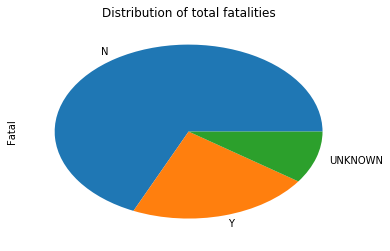

In [5]:
# Total Fatalities include unknown values

s_fatal = df.Fatal.value_counts()
s_fatal.plot.pie(title='Distribution of total fatalities')

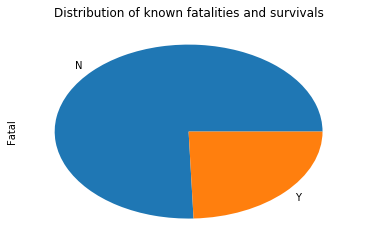

In [26]:
# Taking out the unkown values

fatals_filt = df[~df.Fatal.isin(['UNKNOWN'])]
fatals_filt.Fatal.value_counts().plot.pie(title='Distribution of known fatalities and survivals')

### PROVOKED AND UNPROVOKED ATTACKS

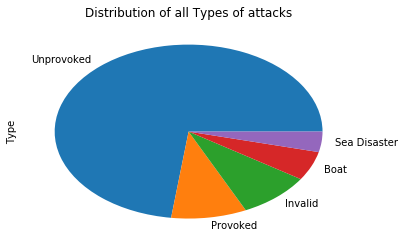

In [7]:
# Types of attack
s_types = df.Type.value_counts()
s_types.plot.pie(title='Distribution of all Types of attacks')

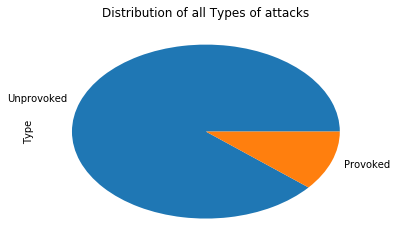

In [8]:
# Types of attack
types_filt = df[df.Type.isin(['Provoked', 'Unprovoked'])]
types_filt.Type.value_counts().plot.pie(title='Distribution of all Types of attacks')

### SPECIES

In [9]:
species_filt = df[
    ~df.Species2.isin(['INVALID ENTRY', 'OTHER / NOT KNOWN'])]

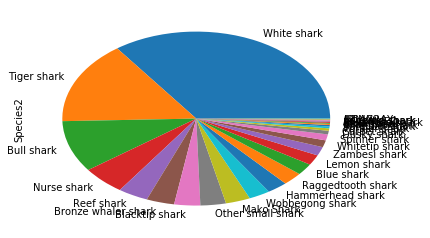

In [10]:
species_filt.Species2.value_counts().plot.pie()

In [11]:
top_sharks = []
for e in list(species_filt.Species2.value_counts().head(5).items()):
    print top_sharks.append(e[0])
top_sharks

None
None
None
None
None


[u'White shark', u'Tiger shark', u'Bull shark', u'Nurse shark', u'Reef shark']

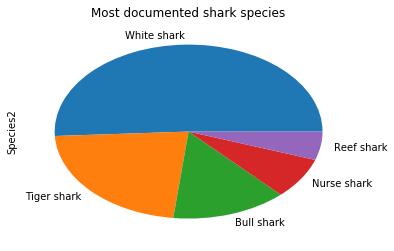

In [12]:
# Top sharks represented and filtered
species_filt.Species2[df.Species2.isin(top_sharks)].value_counts().plot.pie(
    title='Most documented shark species')

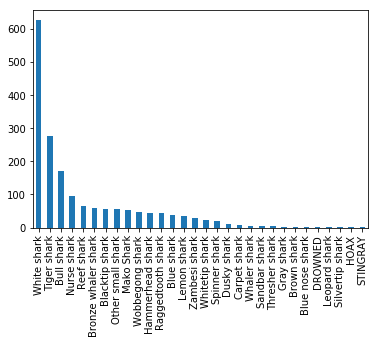

In [13]:
# All species represented
df.Species2[~df.Species2.isin(['INVALID ENTRY',
                               'OTHER / NOT KNOWN'])
           ].value_counts().plot.bar()

In [14]:
# 🔥️ encoding error when representing dataframe
df[~df['Fatal'].isin(['UNKNOWN'])][['Species2', 'Fatal', 'Type']]

UnicodeDecodeError: 'ascii' codec can't decode byte 0xd7 in position 0: ordinal not in range(128)

               Species2 Fatal          Type
0           White shark     N          Boat
1         INVALID ENTRY     N    Unprovoked
2         INVALID ENTRY     N       Invalid
3     OTHER / NOT KNOWN     N    Unprovoked
4           Tiger shark     N      Provoked
5         INVALID ENTRY     N    Unprovoked
6           Tiger shark     Y    Unprovoked
7           Lemon shark     N    Unprovoked
8            Bull shark     N    Unprovoked
9         INVALID ENTRY     N    Unprovoked
10           Reef shark     N      Provoked
11        INVALID ENTRY     N    Unprovoked
12        INVALID ENTRY     N    Unprovoked
13        INVALID ENTRY     N       Invalid
14          Nurse shark     N      Provoked
15        INVALID ENTRY     N    Unprovoked
16    OTHER / NOT KNOWN     N       Invalid
17        INVALID ENTRY     N    Unprovoked
18          Tiger shark     N    Unprovoked
19        INVALID ENTRY     N    Unprovoked
20        INVALID ENTRY     N       Invalid
21    OTHER / NOT KNOWN     N   

# The 5 species with the most registered attacks have a higher *fatalities/survivals ratio* when these attacks are 'PROVOKED' by the victims.

before, I wanted to make a new column that specifies, the species and if it was deadly or not
Firts, I'll take any values which don't contribute to our research, and focus only on the deadliest species

In [15]:
dfz = df[~df.Fatal.isin(['UNKNOWN'])]
dfz

UnicodeEncodeError: 'ascii' codec can't encode character u'\x92' in position 12599: ordinal not in range(128)

UnicodeDecodeError: 'ascii' codec can't decode byte 0xd7 in position 0: ordinal not in range(128)

In [16]:
# Define the sharks I want to consider
killer_sharks =['White shark',
                'Tiger shark',
                'Bull shark',
                'Nurse shark', 
                'Reef shark',
                'Bronze whaler shark']

# How many samples of each species are there?
print(df.Species2[df.Species2.isin(killer_sharks)].value_counts())

# Create a dataframe containing only the indexes with those species
species_fatality = df[df.Species2.isin(killer_sharks)]
#df.Species2.value_counts()

White shark            625
Tiger shark            275
Bull shark             171
Nurse shark             94
Reef shark              65
Bronze whaler shark     60
Name: Species2, dtype: int64


In [17]:
species_fatality = df[df.Species2.isin(killer_sharks)]

In [18]:
species_fatality = species_fatality#.reset_index()


#species_fatality[['Fatal', 'Species2']]
#species_fatality[fatals_filetred]#.value_counts()

In [23]:
dfx = species_fatality[fatals_filt]

ValueError: Must pass DataFrame with boolean values only

In [ ]:
#dfx

In [ ]:
print(dfx.Fatal.value_counts())
print()
print(dfx.Species2.value_counts())

# 🦈️At this point, the data is clean enough to create the plot
## Grouping by Species, and then Fatality

In [ ]:
dfx['Victim_died'] = np.where(dfx.Fatal.isin(['Y']), True, False)
dfx['Victim_survived'] = np.where(dfx.Fatal.isin(['N']), True, False)

In [ ]:
toplot =dfx.groupby(['Species2','Fatal']).agg({'Victim_survived':'sum', 'Victim_died':'sum'})

In [ ]:
toplot.plot.bar()

In [ ]:
toplot

In [ ]:
toplot.T.columns

In [ ]:
examine = "White shark"
toplot.T[examine].plot.bar(title='{} mortality'.format(examine))

In [ ]:
examine = 'Tiger shark'
toplot.T[examine].plot.bar(title='{} mortality'.format(examine))

In [ ]:
examine = 'Bull shark'
toplot.T[examine].plot.bar(title='{} mortality'.format(examine))

In [ ]:
examine = 'Nurse shark'
toplot.T[examine].plot.bar(title='{} mortality'.format(examine))

In [ ]:
df.columns

In [ ]:
dfx[['Species2','Fatal2']].groupby('Species2').agg({'Fatal':"count"})

In [ ]:
sx = df.groupby(["Fatal", "Species2"]).agg({"Date":["min", "max"]})
sx

In [ ]:
sx = df.groupby(["Fatal", "Species2"]).agg({"Date":["min", "max"]})
sx

In [ ]:
def filt(x):
    if x =='UNKNOWN':
        return None
    else:
        return x
df.reset_index()
Fatal_na = df.Fatal.isin(['UNKNOWN'])
Species_na = df.Species2.isin(['INVALID ENTRY', 'OTHER / NOT KNOWN'])
sx = df.loc[~Fatal_na].groupby(["Fatal", "Species2"]).agg({"Type":"count"})
sy = df.loc[~Species_na]
# avoid.value_counts()
#Species_na.value_counts()
#df[~Fatal_na, ~Species_na]
sp_na = df[~Species_na]
df_nonull = sp_na[~Fatal_na]

In [ ]:
df_ok = df_nonull.reset_index()
# df_ok.head().plot.scatter(df_ok.Species2,df_ok.Fatal)

In [ ]:
matplotlib.pyplot.scatter(df_nonull.Fatal, df_nonull.Species2)


In [ ]:
dfx = df[['Species2','Fatal']]
dfx.isnull().sum()

In [ ]:
avoid1 = ~df['Fatal'].isin(['UNKNOWN'])
avoid2 = ~df['Species2'].isin(['OTHER / NOT KNOWN', 'INVALID ENTRY'])
df2p = df[avoid1][avoid2][['Species2', 'Fatal']]
#df2p.plot.bar('Fatal', 'Species2')

In [ ]:
df2p.Fatal.values

In [ ]:
df2p.Species2.values

In [ ]:
Yes = (lambda x: True if x == 'Y' else False)
df2p.groupby('Species2').agg({"Fatal" : Yes})

In [ ]:
df.columns

In [ ]:
# This plot is a mess, don't graph it
#df.Location[df.Location.value_counts() > 20].value_counts().plot.pie()

In [ ]:
# IDEA: make bins to filter the years when it happened

In [ ]:
Years2p = list(range(1800,2020,2))
df.Year[df.Year.isin(Years2p)].value_counts().plot.bar()

In [ ]:
df["Decade"] = pd.cut(df.Year,
                            bins=[1800,1850,1900,1950,2000,2050])
                            #, 
#                            labels=range(1800,2020,10))
df.Decade.value_counts().plot.density()